## Testbank in one Set

Change your models in their definition and run the test

In [48]:
from neuron import h, gui
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp, phase, ih
from cells.neymotin import iteration2

reload(iteration2)
Cell = iteration2.SPI6
Config = iteration2.Config

def CombinedTestBank():
    
    nsteps = 5
    
    ais = np.linspace(32,36,nsteps)
    synapses = np.linspace(10,25,nsteps)
    hmod = np.linspace(1,3,nsteps)

    def stepLayout(hmod, aisl, synapses):

        def HSoma():
            config = Config(h_somaModifier=float(hmod))
            return Cell(config)

        def AIS():
            config = Config(aisL = float(aisl))
            return Cell(config)

        def Synapses():
            config = Config(nsynapses=int(synapses))
            return Cell(config) 

        def Combined():
            config = Config(aisL =float(aisl),h_somaModifier=float(hmod), nsynapses=int(synapses))
            return Cell(config)

        return [HSoma, AIS, Synapses, Combined]
    
    return [ stepLayout(hmod[i],ais[i],synapses[i]) for i in range(nsteps)]
    
    

items = CombinedTestBank()



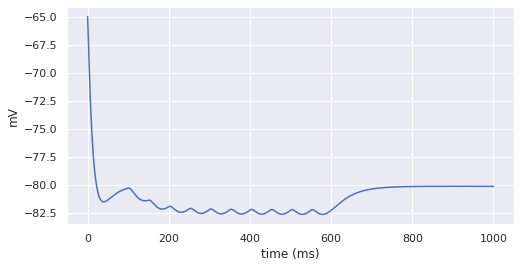

In [71]:
trace = generic.stimulate(items[4][2], {"dur":500, "delay": 100, "amp": 0})
generic.plotTrace(trace)

In [49]:
def testbank(*args, precisiondigits=4, apthreshold = 10):
    results = []
    for cellbuilder in args:
        result = {}
        print(f"Calcuting Rhoebase for {cellbuilder.__name__}")
        undertrace, overtrace = rheobase.calculateRheobase(cellbuilder, precisiondigits=precisiondigits, apthreshold = apthreshold, plot=False) # We have a different apc threshold here
        result["name"] = cellbuilder.__name__
        result["rheo"] = (undertrace, overtrace)
              
        print(f"Calcuting RMP for {cellbuilder.__name__}")
        result["rmp"] = rmp.calculateRMP(cellbuilder, plot=False)
        result["ap-voltage"] = ap.calculateAPThresholdAndDerivative(overtrace)
        results.append(result)
        
    return results

In [50]:
results = []
for i in items:
    results.append(testbank(*i))

Calcuting Rhoebase for HSoma
Detected first AP at 0.22000000000000008  [mA]
Detected first AP at 0.2128000000000001  [mA]
Detected first AP at 0.20862400000000011  [mA]
Detected first AP at 0.20806240000000015  [mA]
Calcuting RMP for HSoma
Calcuting Rhoebase for AIS
Detected first AP at 0.22000000000000008  [mA]
Detected first AP at 0.2128000000000001  [mA]
Detected first AP at 0.20862400000000011  [mA]
Detected first AP at 0.20806240000000015  [mA]
Calcuting RMP for AIS
Calcuting Rhoebase for Synapses
Detected first AP at 0.22000000000000008  [mA]
Detected first AP at 0.2128000000000001  [mA]
Detected first AP at 0.20862400000000011  [mA]
Detected first AP at 0.20806240000000015  [mA]
Calcuting RMP for Synapses
Calcuting Rhoebase for Combined
Detected first AP at 0.22000000000000008  [mA]
Detected first AP at 0.2128000000000001  [mA]
Detected first AP at 0.20862400000000011  [mA]
Detected first AP at 0.20806240000000015  [mA]
Calcuting RMP for Combined
Calcuting Rhoebase for HSoma
Det

In [64]:
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

In [61]:
comprehensivelist = [{**cell["ap-voltage"], "cell": cell["name"], "rheobase": cell["rheo"][1]["params"]["amp"], "rmp": cell["rmp"], "step": index} for index, params in enumerate(results) for cell in params]
frame = pd.DataFrame.from_records(comprehensivelist)

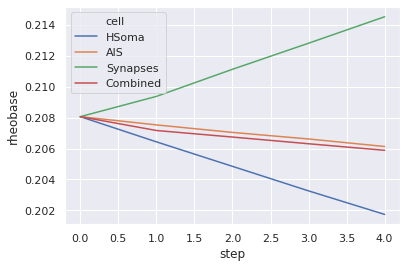

In [65]:
sns.lineplot(x="step", y="rheobase",
             hue="cell",
             data=frame)

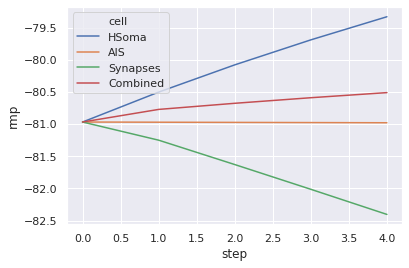

In [66]:
sns.lineplot(x="step", y="rmp",
             hue="cell",
             data=frame)

In [58]:
frame.describe()

,apStartIndex,firstOver20Time,firstOver20Value,peakTime,peakValue,maxSlopeTime,maxSlopePoint,maxSlopeValue,hyperMaxTime,hyperMaxValue,...,tenPercentUpTime,tenPercentDownTime,ninetyPercentUpTime,ninetyPercentDownTime,AP Rise Time,AP Fall Time,AP HW,rheobase,rmp,step
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,8539.750000,213.488413,-56.087263,213.922486,31.492008,213.724461,-2.514440,390.632309,228.134548,-85.191340,...,213.580858,215.914937,213.795086,214.141243,0.214228,1.773694,1.157728,0.207490,-80.861452,2.000000
std,386.169158,9.653988,0.272322,9.651908,0.054561,9.653850,2.583692,2.451375,9.592813,0.309940,...,9.655884,9.655017,9.653827,9.655978,0.007209,0.012760,0.010032,0.002924,0.697276,1.450953
min,7822.000000,195.545111,-56.619401,195.974987,31.353574,195.785294,-6.308677,385.519004,210.299555,-86.041058,...,195.644118,197.974938,195.855882,196.199993,0.211765,1.749944,1.138205,0.201738,-82.404690,0.000000
25%,8230.000000,205.744856,-56.211968,206.181236,31.469163,205.967851,-4.497212,389.466657,220.330804,-85.380598,...,205.826552,208.156188,206.038501,206.381244,0.211765,1.774943,1.161735,0.206265,-80.977490,1.000000
50%,8498.000000,212.444689,-56.109808,212.887486,31.506162,212.685703,-2.849287,391.004880,227.049550,-85.105762,...,212.544281,214.874937,212.756413,213.099993,0.211765,1.774944,1.162471,0.207106,-80.968299,2.000000
75%,8858.000000,221.444464,-55.947892,221.874986,31.523582,221.685294,-1.185361,392.942389,236.074544,-84.920598,...,221.544118,223.874936,221.755882,222.099993,0.211949,1.774944,1.163205,0.208062,-80.570542,3.000000
max,9428.000000,235.694108,-55.560677,236.124986,31.570076,235.935294,2.542422,393.318921,250.224539,-84.912254,...,235.794118,238.124935,236.005882,236.349993,0.235294,1.799943,1.163205,0.214526,-79.331451,4.000000


In [67]:
frame.to_csv('out1003.zip')